# 18 Compartment Graphs and Linear Systems

In [2]:
%load_ext pymatbridge

C:\Anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)


Starting MATLAB on ZMQ socket tcp://127.0.0.1:23961
Send 'exit' command to kill the server
......MATLAB started and connected!


## 18.1 Compartments and Graphs

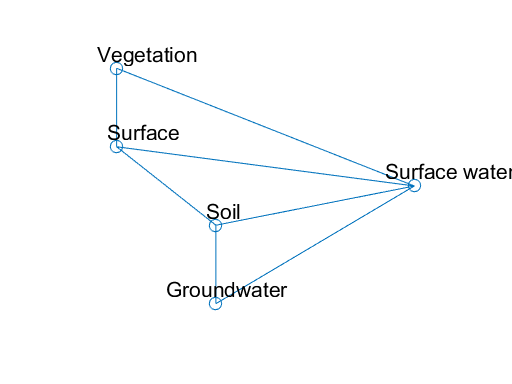

In [3]:
%%matlab
A = [0 1 0 0 1; 0 0 1 0 1; 0 1 0 1 1; 0 0 1 0 1; 0 1 0 1 0];
xy = [1 4; 1 3; 2 2; 2 1; 4 2.5];
gplot (A,xy,'-o');
axis ([0.5 4.5 0.5 4.5]);
text (0.8,4.2,'Vegetation'); text (0.9,3.2,'Surface');
text (1.9,2.2,'Soil'); text (1.5,1.2,'Groundwater');
text (3.7,2.7,'Surface water');
axis off;

## 18.2 Linear Systems

In [ ]:
# %load ch18/nuclides.m
function nuclides
% Solution for a chain of radionuclides
%    using MATLAB expm                   
%   $Ekkehard Holzbecher  $Date: 2006/28/12 $
%--------------------------------------------------------------------------

T = 10;                % maximum time
lambda = [1; 0.1; 0.5];% decay rates  
c0 = [1; 0; 0];        % initial concentrations
q = [0.1; 0; 0];       % source rates
N = 60;                % discretization of time

t = linspace (0,T,N);
B = -diag(lambda);
for i = 2:size(lambda,1)
    B(i,i-1) = lambda(i-1); 
end
c = c0;

for i = 2:N
    E = expm(B*t(i));
    c = [c E*c0-(eye(size(B,1))-E)*inv(B)*q];
end  
plot (t,c');
legend ('mother','daughter 1','daughter 2');
text (T/2,0.8,'Steady state:'); text (T/2,0.7,num2str(-(inv(B)*q)')); 
xlabel ('time');

In [ ]:
# %load ch18/comparts.m
function comparts
% Solution of a linear compartment model with constant input
%    using MATLAB expm                   
%    example see: Walter / Contreras p.181
%   $Ekkehard Holzbecher  $Date: 2006/04/08 $
%--------------------------------------------------------------------------


T = 10;                % maximum time 
C = [-1 1; 1 -3];      % matrix
f = [1; 0];            % input vector
c0 = [1; 1];           % initial concentrations
N = 60;                % discretization of time

t = linspace (0,T,N);
c = c0;
for i = 2:N
    E = expm(C*t(i));
    c = [c E*c0-(eye(size(C,1))-E)*inv(C)*f];
end  
plot (t,c');
legend ('1','2');
text (T/2,1.2,'Eigenvalues:'); text (T/2,1.1,num2str(eig(C)')); 
text (T/2,0.8,'Steady state:'); text (T/2,0.7,num2str(-(inv(C)*f)')); 
xlabel ('time');

## 18.3 Eigenvalues and Phase Space

In [ ]:
# %load ch18/phasediag.m
function phasediag
% Phase diagram visualisation  
%    using MATLAB expm                   
%
%   $Ekkehard Holzbecher  $Date: 2006/04/15 $
%--------------------------------------------------------------------------
T = 10;                % maximum time
C = [-1 1; 1 -3];      % matrix
f = [1; 0];            % input vector
cc = 1;                % initial concentrations (absolute value of the vector)
N = 60;                % discretization of time
M = 16;                % no. of trajectories  

%----------------------execution & output----------------------------------
equilibrium = -(C\f);
t = linspace (0,T,N);
for angle = linspace (0,pi+pi,M)
    c0 = equilibrium + cc*[sin(angle); cos(angle)]; c = c0;
    for i = 2:N
        E = expm(C*t(i));
        c = [c E*c0-(eye(size(C,1))-E)*(C\f)];
    end  
    plot (c(1,:)',c(2,:)'); hold on;
end

plot (equilibrium(1),equilibrium(2),'s');
xlabel ('variable 1'); ylabel ('variable 2')
title ('phase diagram')

## References